In [8]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)  # just for reproducibility

# True underlying parameters (unknown in a real experiment)
D_true      = 2.870      # GHz (zero-field splitting, not directly used here)
f0_true     = 2.873      # GHz, resonance frequency
gamma_true  = 0.004      # GHz, FWHM = 4 MHz
I0_true     = 1.0        # baseline fluorescence
C_true      = 0.03       # contrast (3% dip)

def lorentzian(f, I0, C, f0, gamma):
    """Lorentzian dip model for ODMR."""
    return I0 - C / (1.0 + ((f - f0) / (gamma / 2.0))**2)

# Frequency sweep
freq = np.linspace(2.868, 2.878, 1001)  # 101 points from 2.868 to 2.878 GHz

# Clean Lorentzian
clean_fluor = lorentzian(freq, I0_true, C_true, f0_true, gamma_true)

# Add Gaussian noise
noise_level = 0.003  # ~0.3% noise
fluor = clean_fluor + np.random.normal(0, noise_level, size=freq.shape)
# np.savetxt()


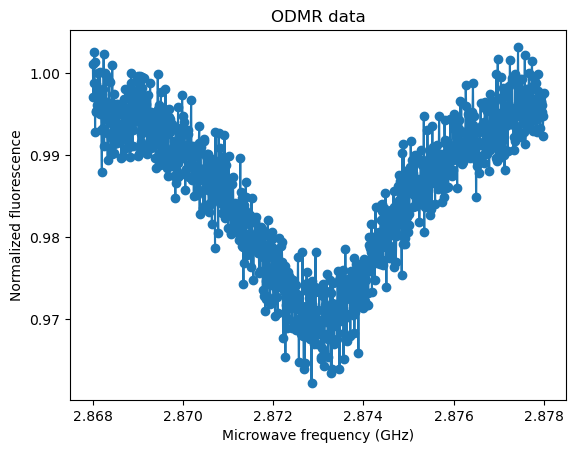

In [9]:


# # Load: assumes two columns, no header
# data = np.loadtxt("odmr_data.txt")
# freq = data[:, 0]  # GHz
# fluor = data[:, 1]

plt.figure()
plt.plot(freq, fluor, 'o-')
plt.xlabel("Microwave frequency (GHz)")
plt.ylabel("Normalized fluorescence")
plt.title("ODMR data")
plt.show()


Fitted resonance frequency f0 = 2.873008 GHz
Fitted linewidth gamma = 0.004208 GHz


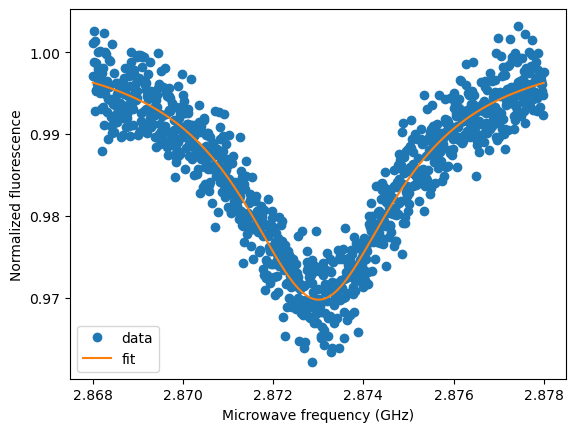

In [10]:
from scipy.optimize import curve_fit

def lorentzian(f, I0, C, f0, gamma):
    """Lorentzian dip model."""
    return I0 - C / (1.0 + ((f - f0) / (gamma/2))**2)

# Initial guesses:
I0_guess = np.max(fluor)
C_guess  = I0_guess - np.min(fluor)
f0_guess = freq[np.argmin(fluor)]
gamma_guess = 0.005  # GHz (5 MHz), just a ballpark

p0 = [I0_guess, C_guess, f0_guess, gamma_guess]

popt, pcov = curve_fit(lorentzian, freq, fluor, p0=p0)
I0_fit, C_fit, f0_fit, gamma_fit = popt

print("Fitted resonance frequency f0 = {:.6f} GHz".format(f0_fit))
print("Fitted linewidth gamma = {:.6f} GHz".format(gamma_fit))

# Plot fit
f_fit = np.linspace(freq.min(), freq.max(), 1000)
fluor_fit = lorentzian(f_fit, *popt)

plt.figure()
plt.plot(freq, fluor, 'o', label="data")
plt.plot(f_fit, fluor_fit, '-', label="fit")
plt.xlabel("Microwave frequency (GHz)")
plt.ylabel("Normalized fluorescence")
plt.legend()
plt.show()


In [11]:
D = 2.870  # GHz
gamma_e = 28.0  # GHz/T

delta_f = f0_fit - D   # GHz
B_NV = (delta_f) / gamma_e  # Tesla

print("Magnetic field along NV axis: {:.3e} T".format(B_NV))
print(" -> {:.3f} mT".format(B_NV*1e3))
print(" -> {:.1f} µT".format(B_NV*1e6))


Magnetic field along NV axis: 1.074e-04 T
 -> 0.107 mT
 -> 107.4 µT
